# Cartopy package practice

David Tersegno

4/9/22

mapping with matplotlib. Following the [getting started](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html) section of the cartopy docs.

# Imports

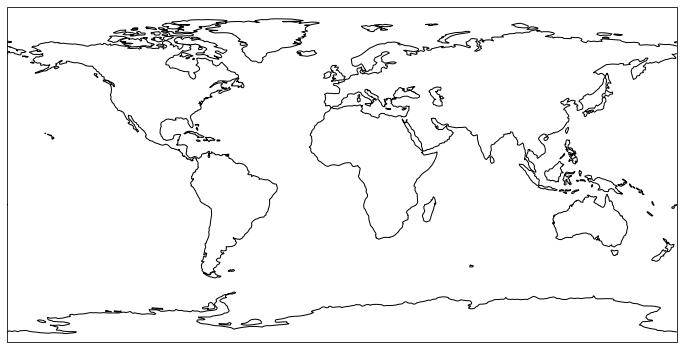

In [161]:
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy as cpy
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import numpy as np

plt.figure(figsize=(12,12))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines() #arguments for specific areas, resolution, etc?

# plt.savefig() # wow wish I knew about this earlier.

plt.show()

## Projections

The above image uses the PlateCarree projection.

The list of available projections and their results is at [this website on the internet.](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections)

## stock_img()
use the stock_img() method to add an underlay image.

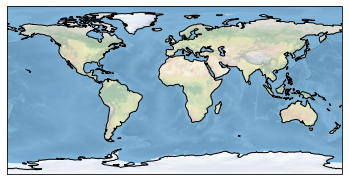

In [9]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
plt.show()

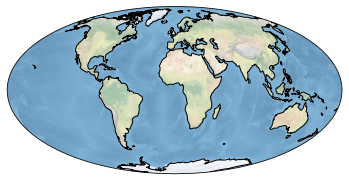

In [10]:
ax = plt.axes(projection = ccrs.Mollweide())
ax.stock_img()
ax.coastlines()
plt.show()

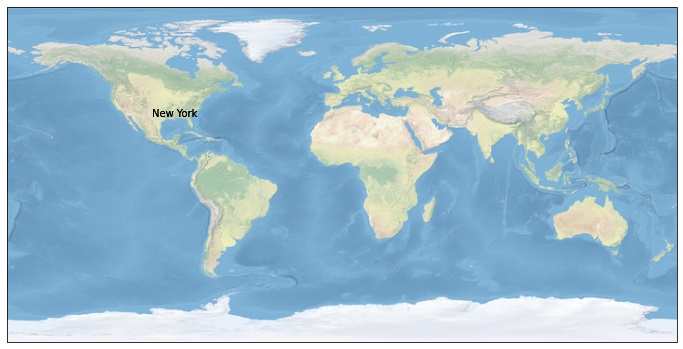

In [40]:
#add text

plt.figure(figsize = (12,12))

ny_lon = -75
ny_lat = 43


#proj = ccrs.Mollweide()
proj = ccrs.PlateCarree()


ax = plt.axes(projection = proj)

ax.stock_img()

#### text
plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform =ccrs.PlateCarree())

#what's the difference between these two transforms?
plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform =ccrs.Geodetic())


plt.show()


Either `PlateCarree()` or `Geodetic()` places the text at almost the same location. I'm not sure what the difference is at this point.

Add in a line and see how it gets transformed.

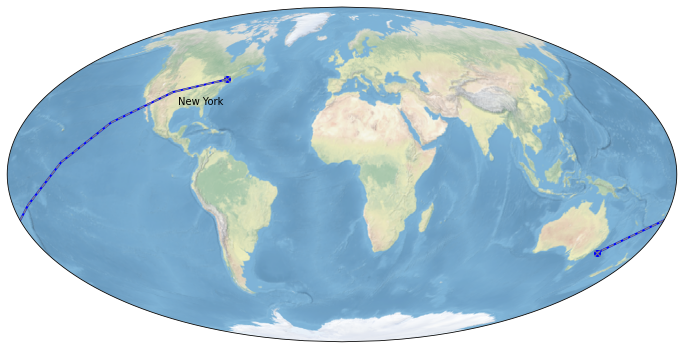

In [94]:
# add a cute line
plt.figure(figsize = (12,12))

ny_lon = -75
ny_lat = 43
s_lon = 155
s_lat = -35


proj = ccrs.Mollweide()
#proj = ccrs.PlateCarree()


ax = plt.axes(projection = ccrs.Mollweide())

ax.stock_img()


### text
plt.text(ny_lon +5, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform = ccrs.Geodetic())

plt.plot([ny_lon, s_lon], [ny_lat, s_lat],
         color='blue', linewidth=2, marker='o',
         transform = ccrs.Geodetic()
         )

plt.plot([ny_lon, s_lon], [ny_lat, s_lat],
         color='gray', linestyle='--', marker = 'x',
         transform = ccrs.Geodetic()
         )




plt.show()

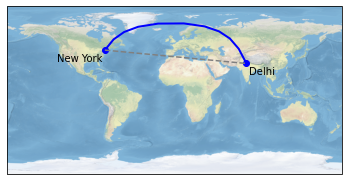

In [64]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

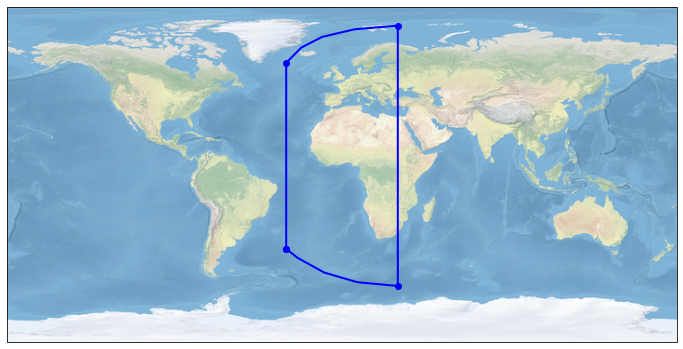

In [103]:
plt.figure(figsize = (12,12))


ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

lats = np.array([-20,30,40,-30,-20])*2
lons = [-30,-30,30,30, -30]

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot(lons, lats,
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.show()

## plotting states.

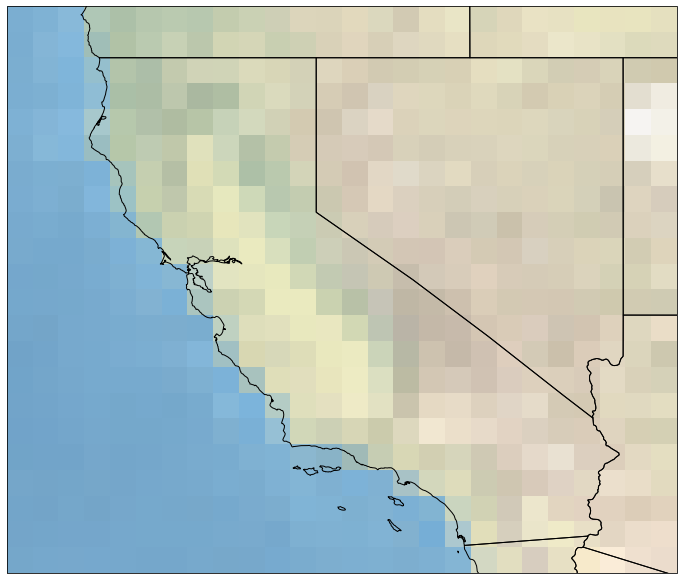

In [153]:
west_edge = -126 #left
east_edge = -113 #right

north_edge = 43 #top
south_edge = 32 #bottom

# plt.figure(figsize = (12,12))
# ax = plt.axes(projection=ccrs.PlateCarree())


plt.figure(figsize=(12,12))
ax = plt.axes(projection = cpy.crs.PlateCarree())
ax.add_feature(cpy.feature.STATES)
# ax.stock_img()


plt.xlim(west_edge,east_edge)
plt.ylim(south_edge, north_edge)

ax.stock_img()

## try putting down california 

In [155]:

os.listdir('../border_shapefiles/')

['TIGER-Line Shapefile, 2019, state, California, Current Census Tract State-based - CKAN.url',
 'tl_2019_06_tract.cpg',
 'tl_2019_06_tract.dbf',
 'tl_2019_06_tract.prj',
 'tl_2019_06_tract.shp',
 'tl_2019_06_tract.shp.ea.iso.xml',
 'tl_2019_06_tract.shp.iso.xml',
 'tl_2019_06_tract.shx']

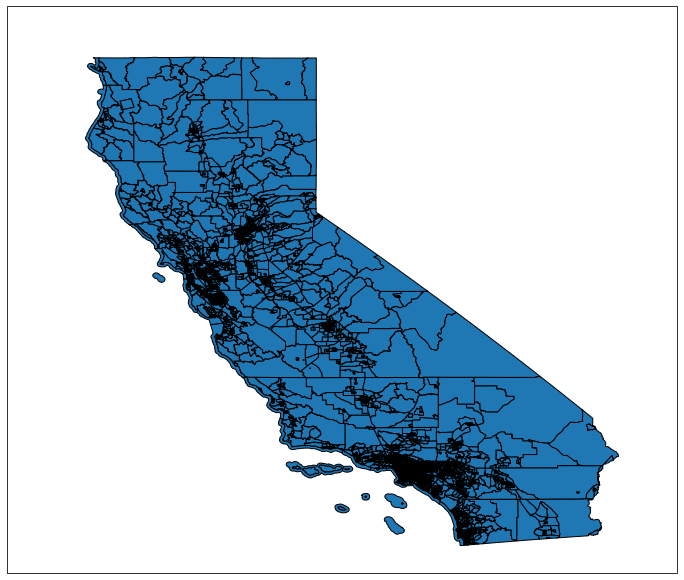

In [163]:
shapefile = '../border_shapefiles/tl_2019_06_tract.shp'
shape_feature = shape_feature = ShapelyFeature(Reader(shapefile).geometries(), ccrs.PlateCarree(), edgecolor='black')
plt.figure(figsize = (12,12))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(shape_feature, zorder = 1)

plt.xlim(west_edge,east_edge)
plt.ylim(south_edge, north_edge)
plt.show();